## Plot 0D Reactor Data

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

from numpy import diff

import cantera as ct

In [2]:
OutputDir  = WORKSPACE_PATH+'/ROMNet/Data/0DReact_Isobaric_2000Cases_NEq_Shift/'

CasesVec   = [1]#[0,2,4,6,8]
DirDir     = OutputDir 

NVarsRed   = 13

InputVars  = []
for i in range(NVarsRed):
    InputVars.append('PC_'+str(i+1))
InputVars

['PC_1',
 'PC_2',
 'PC_3',
 'PC_4',
 'PC_5',
 'PC_6',
 'PC_7',
 'PC_8',
 'PC_9',
 'PC_10',
 'PC_11',
 'PC_12',
 'PC_13']

In [3]:
ICsVec = pd.read_csv(OutputDir+'/Orig/train/ext/ICs.csv').to_numpy()
P0sVec       = ICsVec[:,0]
EqRatio0sVec = ICsVec[:,1]
T0sVec       = ICsVec[:,2]

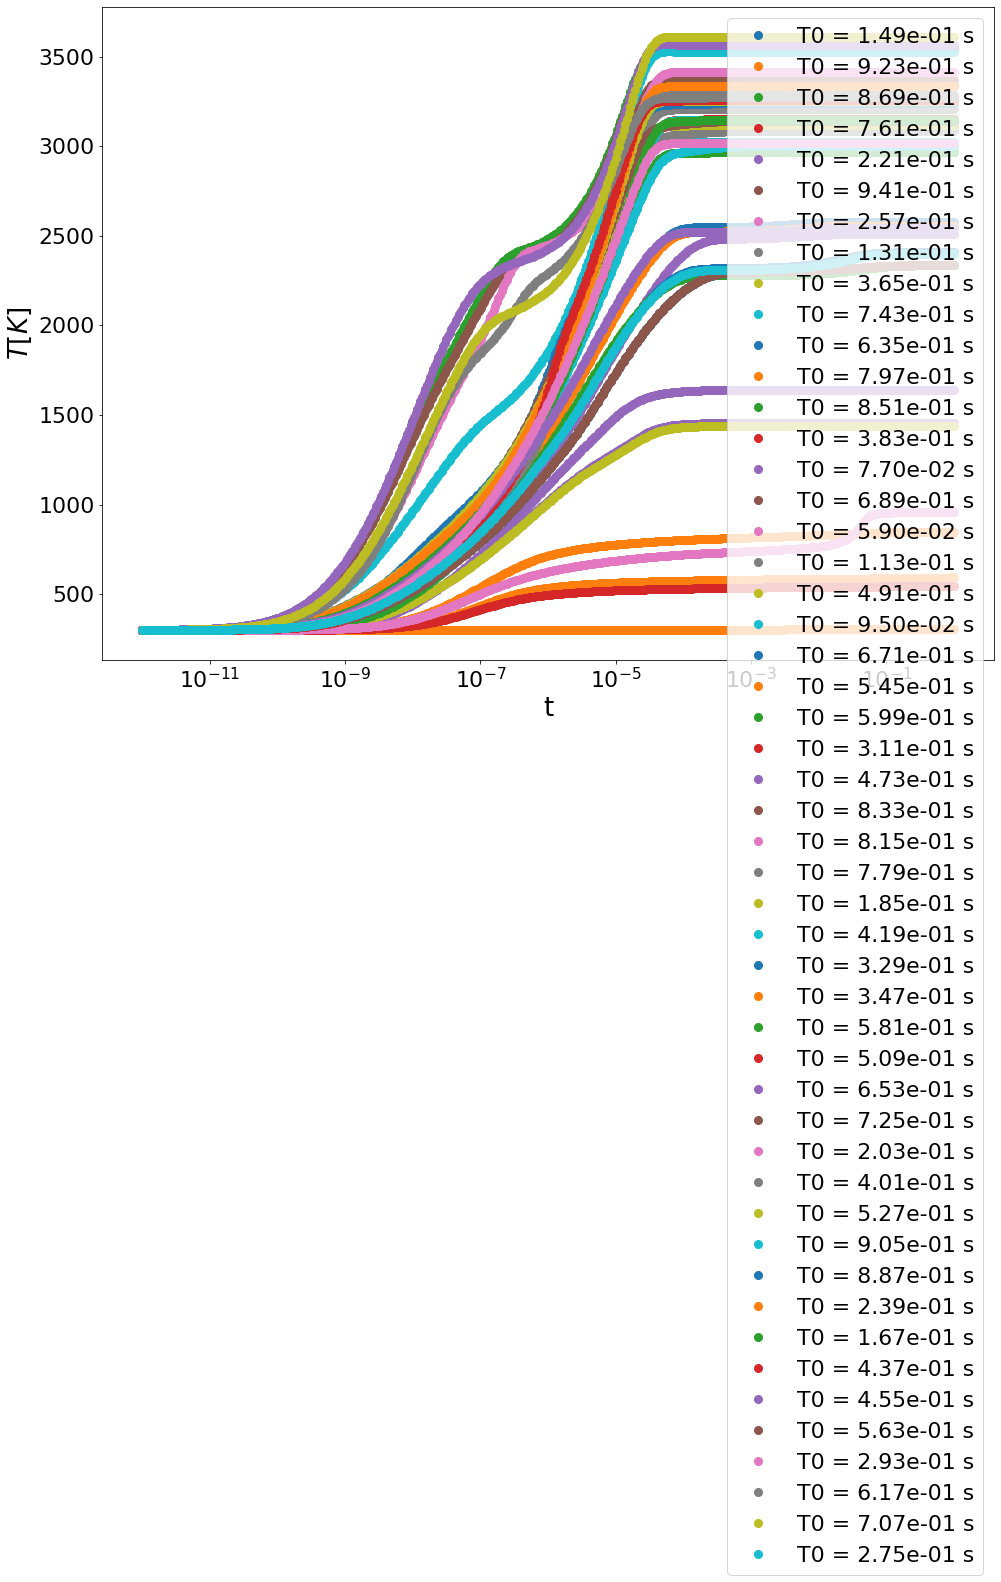

In [4]:
fig  = plt.figure(figsize=(16,12))
for i in range(len(T0sVec)):
    Data1 = pd.read_csv(OutputDir+'/Orig/train/ext/y.csv.'+str(i+1))
    
    plt.plot(Data1['t'], Data1['T'], 'o', label='T0 = '+"{:.2e}".format(T0sVec[i])+' s')
    
    plt.xlabel('t')
    plt.ylabel(r'$T [K]$')
    plt.legend()
    plt.xscale('log')

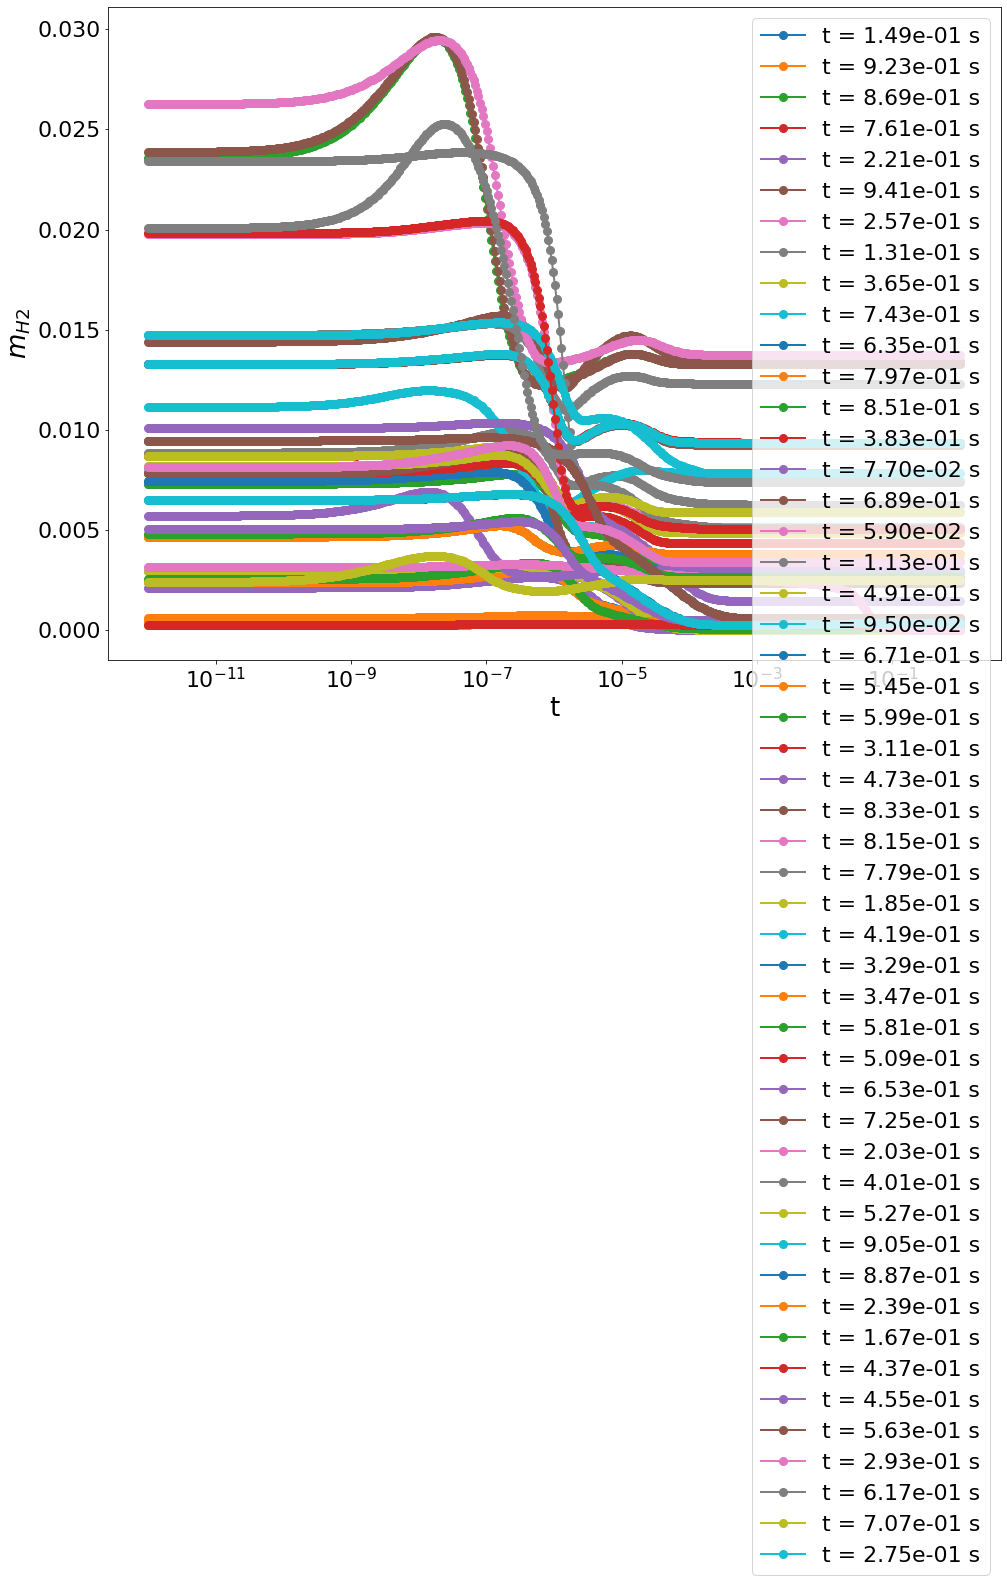

In [5]:
fig  = plt.figure(figsize=(16,12))
for i in range(len(T0sVec)):
    Data1 = pd.read_csv(OutputDir+'/Orig/train/ext/y.csv.'+str(i+1))
    
    plt.plot(Data1.t, Data1.H2, '-o', label='t = '+"{:.2e}".format(T0sVec[i])+' s')
    
    plt.xlabel('t')
    plt.ylabel(r'$m_{H2}$')
    plt.legend()
    plt.xscale('log')

Text(0, 0.5, 'PC_2')

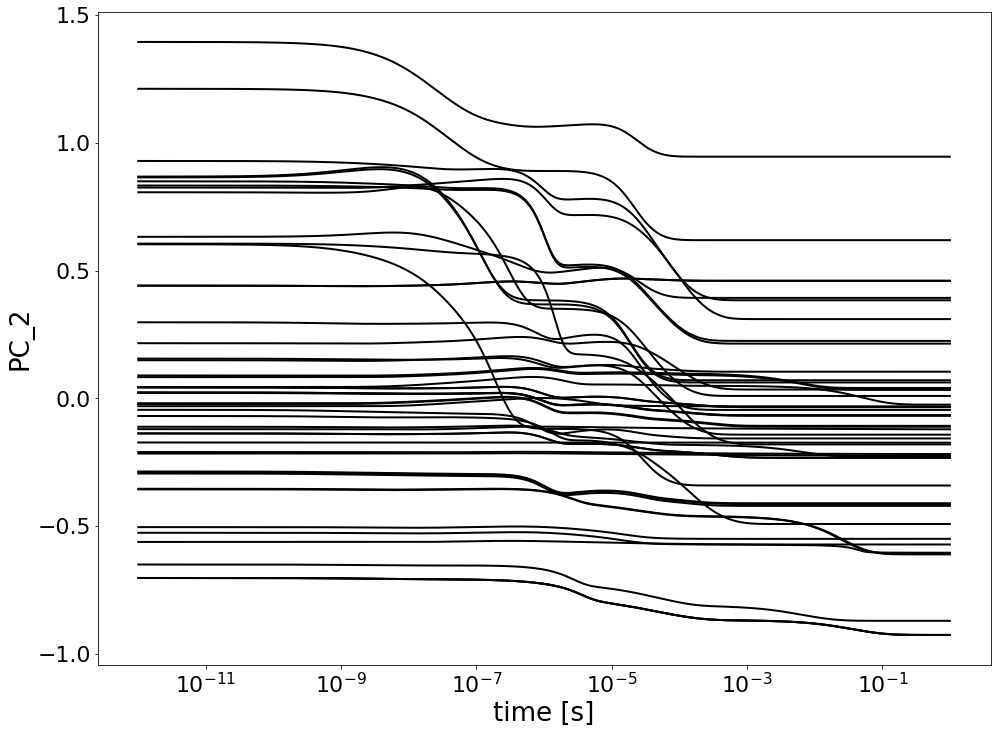

In [6]:
### Evaluating on Test Data

iPC    = 1

fig = plt.figure(figsize=(16,12))
for iTest in range(len(T0sVec)):

    FileName                     = DirDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iTest+1)
    InputDataTest                = pd.read_csv(FileName, header=0)
    tVec                         = InputDataTest['t'].to_numpy()
    #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
    yMat_pca                     = InputDataTest[InputVars].to_numpy()
    y0_pca                       = yMat_pca[0,:]
    #print('y0_pca = ', y0_pca)
    
    plt.plot(tVec, yMat_pca[:,iPC], '-k', label='From ODE', lw=2)

plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel('PC_'+str(iPC+1))
#plt.legend()

In [7]:
FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/A.csv'
A        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/C.csv'
C        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/'+str(NVarsRed)+'PC/ROM/D.csv'
D        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

iTest =  0
iTest =  1
iTest =  2
iTest =  3
iTest =  4
iTest =  5
iTest =  6
iTest =  7
iTest =  8
iTest =  9
iTest =  10
iTest =  11
iTest =  12
iTest =  13
iTest =  14
iTest =  15
iTest =  16
iTest =  17
iTest =  18
iTest =  19
iTest =  20
iTest =  21
iTest =  22
iTest =  23
iTest =  24
iTest =  25
iTest =  26
iTest =  27
iTest =  28
iTest =  29
iTest =  30
iTest =  31
iTest =  32
iTest =  33
iTest =  34
iTest =  35
iTest =  36
iTest =  37
iTest =  38
iTest =  39
iTest =  40
iTest =  41
iTest =  42
iTest =  43
iTest =  44
iTest =  45
iTest =  46
iTest =  47
iTest =  48
iTest =  49


Text(0, 0.5, 'H2O')

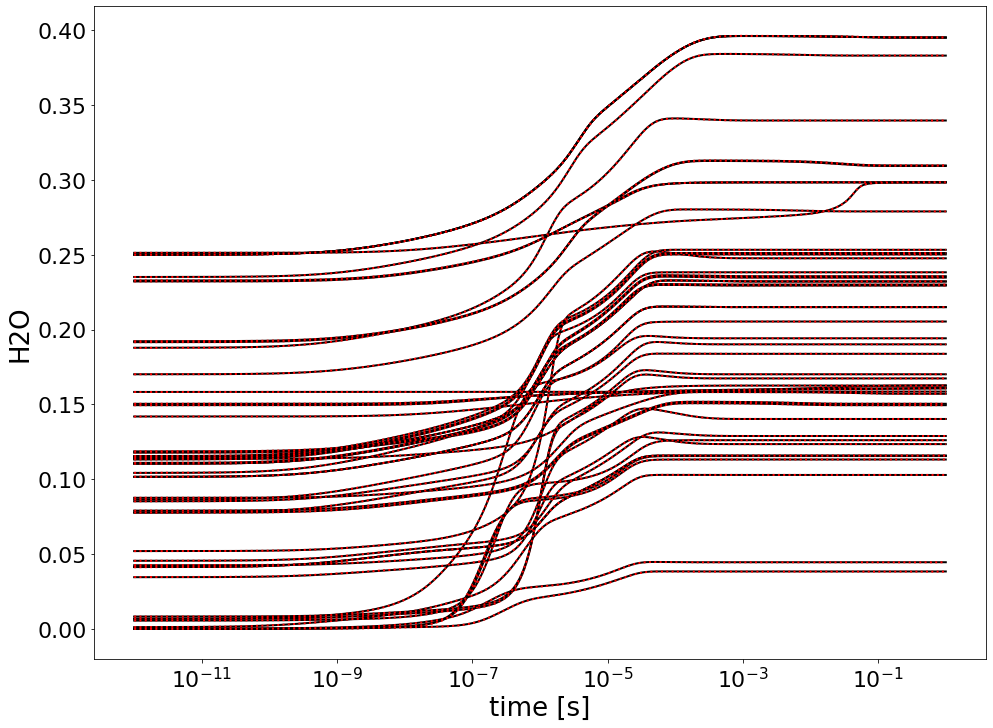

In [9]:
CasesVec = np.arange(10)

FileName = DirDir +'/Orig/train/ext/CleanVars.csv'
Data     = pd.read_csv(FileName, header=None)
VarNames = list(Data.to_numpy()[0,:])

VarOI    = 'H2O'
iVar     = VarNames.index(VarOI)
        
fig = plt.figure(figsize=(16,12))
for iTest in range(50):

    FileName                     = DirDir+'/'+str(NVarsRed)+'PC/train/ext/PC.csv.'+str(iTest+1)
    InputDataTest                = pd.read_csv(FileName, header=0)
    tVec                         = InputDataTest['t'].to_numpy()
    #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
    yMat_pca                     = InputDataTest[InputVars].to_numpy()
    yMat_                        = (yMat_pca.dot(A))*D[:,0] + C[:,0]
    
    FileName     = DirDir +'/Orig/train/ext/y.csv.'+str(iTest+1)
    Data         = pd.read_csv(FileName, header=0)
    tVec         = Data.to_numpy()[:,0]
    yMat         = Data.to_numpy()[:,1:]
    VarOrig      = list(Data.columns)
    iVarOrig     = VarOrig.index(VarOI)-1
        
    plt.plot(tVec, yMat[:,iVarOrig],  '-k', label='From ODE',                   lw=2)
    plt.plot(tVec, yMat_[:,iVar], ':r', label='From Surrogate Source Term', lw=2)
    
    if tVec[-1] > 3.e-1:
        print('iTest = ', iTest)

plt.xscale('log')
#plt.yscale('log')
plt.xlabel('time [s]')
plt.ylabel(VarOI)
#plt.legend()